In [1]:
import matplotlib.pyplot as plt 
import pandas as pd
import os  
import pickle

### 1. Preview 

In [2]:
# Path to files 
path1 = 'Data_outcomes/2020-04/2020-04-city-of-london-outcomes.csv'
path2 = 'Data_streets/2020-04/2020-04-city-of-london-street.csv'

In [3]:
# Read csv 
df_outcomes = pd.read_csv(path1)
df_streets = pd.read_csv(path2)

FileNotFoundError: [Errno 2] No such file or directory: 'Data_outcomes/2020-04/2020-04-city-of-london-outcomes.csv'

In [ ]:
# dtypes
df_outcomes.dtypes

Crime ID                object
Month           datetime64[ns]
Reported by             object
Falls within            object
Longitude              float64
Latitude               float64
Location                object
LSOA code               object
LSOA name               object
Outcome type            object
dtype: object

In [ ]:
# dtypes
df_streets.dtypes

Crime ID                         object
Month                    datetime64[ns]
Reported by                      object
Falls within                     object
Longitude                       float64
Latitude                        float64
Location                         object
LSOA code                        object
LSOA name                        object
Crime type                       object
Last outcome category            object
Context                         float64
dtype: object

In [ ]:
# Attributes of london_outcomes 
list(df_outcomes.columns)

['Crime ID',
 'Month',
 'Reported by',
 'Falls within',
 'Longitude',
 'Latitude',
 'Location',
 'LSOA code',
 'LSOA name',
 'Outcome type']

In [ ]:
# Attributes of lds_street
list(df_streets.columns)

['Crime ID',
 'Month',
 'Reported by',
 'Falls within',
 'Longitude',
 'Latitude',
 'Location',
 'LSOA code',
 'LSOA name',
 'Crime type',
 'Last outcome category',
 'Context']

In [ ]:
# Types of Crime 
list(df_streets['Crime type'].unique())

['Anti-social behaviour',
 'Shoplifting',
 'Theft from the person',
 'Burglary',
 'Violence and sexual offences',
 'Drugs',
 'Criminal damage and arson',
 'Other theft',
 'Public order',
 'Vehicle crime',
 'Other crime',
 'Bicycle theft',
 'Possession of weapons']

In [ ]:
# outcome category
list(df_streets['Last outcome category'].unique())

[nan,
 'Unable to prosecute suspect',
 'Formal action is not in the public interest',
 'Court result unavailable',
 'Investigation complete; no suspect identified',
 'Offender given a caution',
 'Status update unavailable',
 'Further investigation is not in the public interest',
 'Offender given penalty notice',
 'Local resolution',
 'Action to be taken by another organisation']

In [ ]:
# Outcome type
list(df_outcomes['Outcome type'].unique())

['Investigation complete; no suspect identified',
 'Unable to prosecute suspect',
 'Action to be taken by another organisation',
 'Further investigation is not in the public interest',
 'Formal action is not in the public interest',
 'Suspect charged',
 'Offender given a caution',
 'Local resolution',
 'Offender given penalty notice']

In [ ]:
# Context is all na
df_streets[df_streets.Context.notna()]

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context


### 2. Load the dataset

In [4]:
# Data_streets
PATH = 'Data_streets'
lst_df = []
for subdir in os.listdir(PATH):
    file_path = os.path.join(PATH, subdir)
    for file in os.listdir(file_path):
        file = os.path.join(file_path, file)
        try:
            lst_df.append(pd.read_csv(file))
        except FileNotFoundError:
            continue

df_streets = pd.concat(lst_df)


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'Data_streets'

In [5]:
# Data_outcomes
PATH = 'Data_outcomes'
lst_df = []
for subdir in os.listdir(PATH):
    file_path = os.path.join(PATH, subdir)
    for file in os.listdir(file_path):
        file = os.path.join(file_path, file)
        try:
            lst_df.append(pd.read_csv(file))
        except FileNotFoundError:
            continue

df_outcomes = pd.concat(lst_df)


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'Data_outcomes'

In [ ]:
# convert to TimeStamp object
df_streets['Month'] = pd.to_datetime(df_streets['Month'])
df_outcomes['Month'] = pd.to_datetime(df_outcomes['Month'])

In [ ]:
# Save overall file
df_streets.to_pickle('Data/streets_all.pk')
df_outcomes.to_pickle('Data/outcomes_all.pk')

In [ ]:
# Load LSOAs code name and stats
LSOAs = pd.read_csv('../data/LSOAs/Lower_Layer_Super_Output_Area_(2021)_EW_BFE.csv')
LSOAs.head()

,FID,LSOA21CD,LSOA21NM,GlobalID,SHAPE_Length,SHAPE_Area
0,1,E01000001,City of London 001A,{A7E5D9CE-97C6-4F55-9980-0A1A5D7896A4},2635.767993,129865.314435
1,2,E01000002,City of London 001B,{A85095E8-5D84-43EC-B70C-3C40EF5F101B},2707.816821,228419.782304
2,3,E01000003,City of London 001C,{0591184F-D5D3-41BE-A162-2A8C4ABD3A20},1224.573160,59054.204611
3,4,E01000005,City of London 001E,{A42DE630-5FD1-4CDF-AD5A-2C48BBC58583},2275.805344,189577.709493
4,5,E01000006,Barking and Dagenham 016A,{20EEEF1C-EF4D-427D-A86F-F6E0E27A8610},1966.092607,146536.995720


In [6]:
# Barnet_lsoa 
Barnet_lsoa = LSOAs[LSOAs.LSOA21NM.apply(lambda row : 'Barnet' in row)]['LSOA21CD']
LSOAs.iloc[Barnet_lsoa.index].head()

NameError: name 'LSOAs' is not defined

In [7]:
# Drop NAs for no LSOA available 
df_streets.dropna(subset=['LSOA code', 'LSOA name'], inplace=True)
df_streets.reset_index(drop=True, inplace=True)
print(sum(df_streets['LSOA name'].isnull()))
print(sum(df_streets['LSOA code'].isnull()))


NameError: name 'df_streets' is not defined

In [ ]:
# Filter and output only Barnet cases
df_streets_Barnet = df_streets[df_streets['LSOA code'].isin(list(Barnet_lsoa))].copy()
df_streets_Barnet.to_pickle('Data/streets_Barnet.pk')

In [ ]:
# 5 LSOAs have no burglary 
len(list(df_streets_Barnet['LSOA name'].unique()))

205

In [ ]:
# Filter only Burglary 
df_streets_Barnet_burglary = df_streets_Barnet[df_streets_Barnet['Crime type']=='Burglary'].copy()
df_streets_Barnet_burglary.to_pickle('Data/streets_Barnet_burglary.pk')

In [ ]:
# 5 LSOAs have no burglary 
len(df_streets_Barnet_burglary['LSOA name'].unique())

205

### 3. Aggregations

In [ ]:
# Load from pickles
df_streets_Barnet_burglary = pd.read_pickle('../data/streets_Barnet_burglary.pk')
df_streets_Barnet_burglary = df_streets_Barnet_burglary[['Month', 'LSOA code', 'LSOA name', 'Location', 'Crime ID']].copy()

In [ ]:
# Seasonal analysis 
df_streets_Barnet_burglary['Time'] = df_streets_Barnet_burglary.Month
df_streets_Barnet_burglary['Month'] = df_streets_Barnet_burglary['Time'].apply(lambda row: row.month)
df_streets_Barnet_burglary['Year'] = df_streets_Barnet_burglary['Time'].apply(lambda row: row.year)

### 4. Unit of analysis I: Seasonal effect - Trending

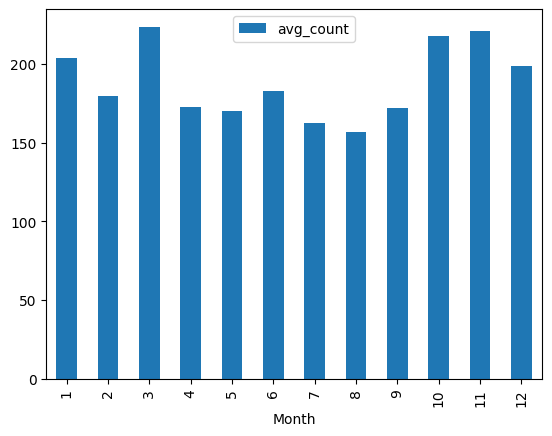

In [ ]:
# Plot (remove 2023 for seasonal analysis)
df_months = df_streets_Barnet_burglary[(df_streets_Barnet_burglary.Year != 2023) & (df_streets_Barnet_burglary.Year != 2020)].groupby(['Month']).count()
df_months['avg_count'] = data=df_months['Year']/2
df_months.plot(kind='bar', y='avg_count');

In [ ]:
df_streets_Barnet_burglary.groupby(['Year', 'Month']).count().head()

LSOA code  LSOA name  Location  Crime ID  Time
Year Month                                                
2020 4            123        123       123       123   123
     5            150        150       150       150   150
     6            157        157       157       156   157
     7            178        178       178       177   178
     8            232        232       232       231   232

In [ ]:
# Total count of crime Barnet ~ time 
df_total = df_streets_Barnet_burglary.groupby('Time').count()
df_total = df_total.reset_index()[['Time', 'Year']]
df_total.columns = ['Time', 'Crime_count']
df_total.head()

,Time,Crime_count
0,2020-04-01,123
1,2020-05-01,150
2,2020-06-01,157
3,2020-07-01,178
4,2020-08-01,232


In [ ]:
# Output the df_total
df_total.to_csv('Data/streets_total_count.csv')

OSError: Cannot save file into a non-existent directory: 'Data'

### 4. Mapping to wards level

In [ ]:
# Read LSOAs_to_wards
wards = pd.read_csv('../data/LSOAs/LSOA_(2021)_to_Ward_to_Lower_Tier_Local_Authority_(May_2022)_Lookup_for_England_and_Wales.csv')
wards = wards[['LSOA21CD', 'WD22NM']]
wards['LSOA code'] = wards['LSOA21CD']
wards.drop(columns=['LSOA21CD'])

,WD22NM,LSOA code
0,Aldersgate,E01000001
1,Cripplegate,E01000002
2,Cripplegate,E01000003
3,Portsoken,E01000005
4,Northbury,E01000006
...,...,...
35667,St Augustine's,W01002036
35668,St Augustine's,W01002037
35669,Rhoose,W01002038
35670,Rhoose,W01002039


In [ ]:
# Map
df_streets_Barnet_burglary = df_streets_Barnet_burglary.reset_index()[['Year', 'Month', 'Time', 'LSOA code']]
df= pd.merge(
    left=df_streets_Barnet_burglary,
    right=wards,
    on='LSOA code',
    how='left',
)
# df = df[['Month', 'Year', 'Time', 'WD22NM']]
df

,Year,Month,Time,LSOA code,LSOA21CD,WD22NM
0,2020,4,2020-04-01,E01000249,E01000249,High Barnet
1,2020,4,2020-04-01,E01000292,E01000292,Underhill
2,2020,4,2020-04-01,E01000292,E01000292,Underhill
3,2020,4,2020-04-01,E01000292,E01000292,Underhill
4,2020,4,2020-04-01,E01000292,E01000292,Underhill
...,...,...,...,...,...,...
6988,2023,3,2023-03-01,E01000139,E01000139,Childs Hill
6989,2023,3,2023-03-01,E01000139,E01000139,Childs Hill
6990,2023,3,2023-03-01,E01000140,E01000140,Childs Hill
6991,2023,3,2023-03-01,E01000140,E01000140,Childs Hill


In [ ]:
# Format
df_all = pd.pivot_table(df, values='Year', index='Time', columns='WD22NM', aggfunc='count')
df_all.columns.name = None
df_all = df_all.reset_index()
df_all.head()

,Time,Barnet Vale,Brunswick Park,Burnt Oak,Childs Hill,Colindale North,Colindale South,Cricklewood,East Barnet,East Finchley,...,Golders Green,Hendon,High Barnet,Mill Hill,Totteridge & Woodside,Underhill,West Finchley,West Hendon,Whetstone,Woodhouse
0,2020-04-01,3.0,4.0,6.0,10.0,3.0,1.0,10.0,5.0,1.0,...,8.0,9.0,2.0,7.0,8.0,6.0,4.0,7.0,3.0,3.0
1,2020-05-01,8.0,4.0,9.0,9.0,4.0,NaN,10.0,5.0,7.0,...,6.0,13.0,6.0,5.0,8.0,1.0,4.0,13.0,7.0,2.0
2,2020-06-01,13.0,3.0,8.0,13.0,4.0,NaN,9.0,10.0,3.0,...,8.0,14.0,3.0,4.0,6.0,3.0,4.0,7.0,10.0,8.0
3,2020-07-01,7.0,6.0,8.0,23.0,2.0,NaN,9.0,5.0,5.0,...,5.0,14.0,5.0,6.0,6.0,3.0,10.0,5.0,11.0,9.0
4,2020-08-01,10.0,9.0,9.0,21.0,7.0,NaN,5.0,4.0,5.0,...,21.0,20.0,13.0,12.0,12.0,4.0,8.0,10.0,6.0,NaN


In [ ]:
# Output to csv 
df_all.to_csv('Data/streets_wards.csv')